In [ ]:
# CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can 
analyse all relevant customer data and develop focused customer retention programs.

# DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column 
Metadata. The data set includes information about:
    
• Customers who left within the last month – the column is called Churn
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
protection, tech support, and streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly 
charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents

# PROJECT OBJECTIVE: Build a model that will help to identify the potential customers who have a higher probability to churn. 

This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising 
customer retention.

# Steps to the project: 

#1. Import and warehouse data: 

• Import all the given datasets. Explore shape and size. 
• Merge all datasets onto one and explore final shape and size.

#2. Data cleansing: 

• Missing value treatment
• Convert categorical attributes to continuous using relevant functional knowledge
• Drop attribute/s if required using relevant functional knowledge
• Automate all the above steps

#3. Data analysis & visualisation: 

• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

#4. Data pre-processing:

• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split.
• Check if the train and test data have similar statistical characteristics when compared with original data.

#5. Model training, testing and tuning: 

• Train and test all ensemble models taught in the learning module.
• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
• Display the classification accuracies for train and test data.
• Apply all the possible tuning techniques to train the best model for the given data. 
• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 
• Display and compare all the models designed with their train and test accuracies.
• Select the final best trained model along with your detailed comments for selecting this model. 
• Pickle the selected model for future use.

#6. Conclusion and improvisation: 

• Write your conclusion on the results.
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the 
telecom operator to perform a better data analysis in future

 # Import libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import  Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
data=pd.read_csv('TelcomCustomer-Churn.csv')


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.size

147903

In [6]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
data_nullcols = data.isnull().sum()
data_nullcols

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Hence,  there is no missing values.

In [8]:
#print dtypes values in the data sets
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Generate the data information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Generate descriptive statistics

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
data.mean()

SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

In [13]:
data.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

# EDA bye using the build the plots 
# univariate, bivariate and multivariate analysis

In [14]:
#plot the graphs of different variable to see the distributions.

import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges', ylabel='count'>

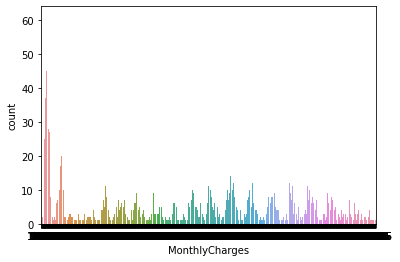

In [15]:
sns.countplot(data['MonthlyCharges'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

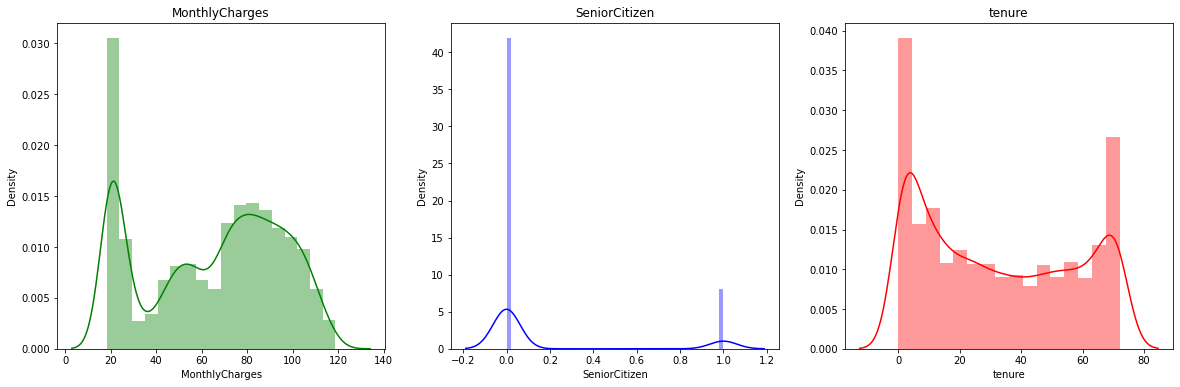

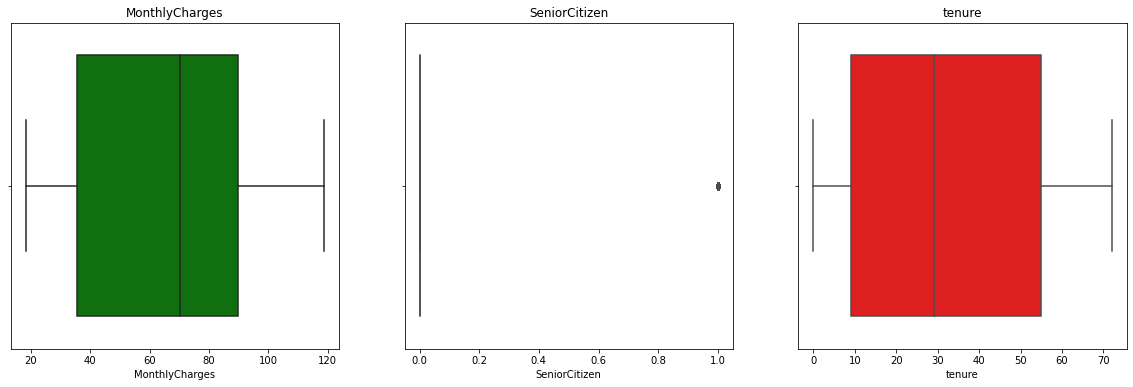

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MonthlyCharges')
sns.distplot(data['MonthlyCharges'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('SeniorCitizen')
sns.distplot(data['SeniorCitizen'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('tenure')
sns.distplot(data['tenure'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MonthlyCharges')
sns.boxplot(data['MonthlyCharges'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('SeniorCitizen')
sns.boxplot(data['SeniorCitizen'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('tenure')
sns.boxplot(data['tenure'],orient='vertical',color='red')


plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

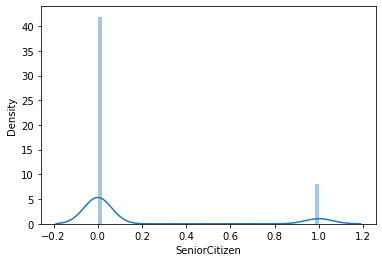

In [17]:
sns.distplot(data['SeniorCitizen'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


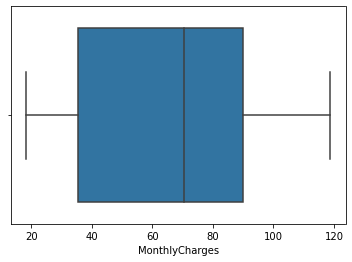

In [18]:
sns.boxplot(data['MonthlyCharges']);

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

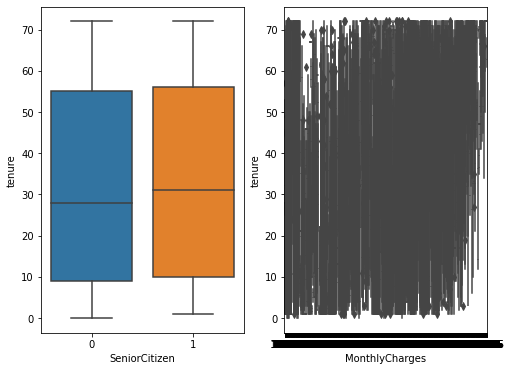

In [19]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(x = 'SeniorCitizen', y = 'tenure', data = data)
plt.subplot(1,2,2)
sns.boxplot(x = 'MonthlyCharges', y = 'tenure', data = data)

In [20]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = data.corr()
corr.style


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [21]:
corr.dtypes

SeniorCitizen     float64
tenure            float64
MonthlyCharges    float64
dtype: object

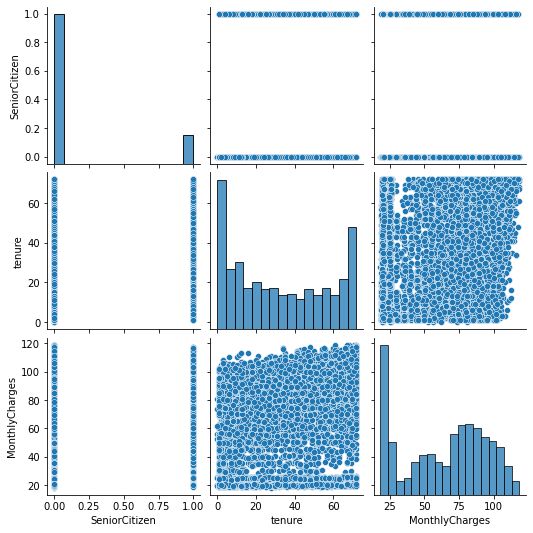

In [22]:
sns.pairplot(data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


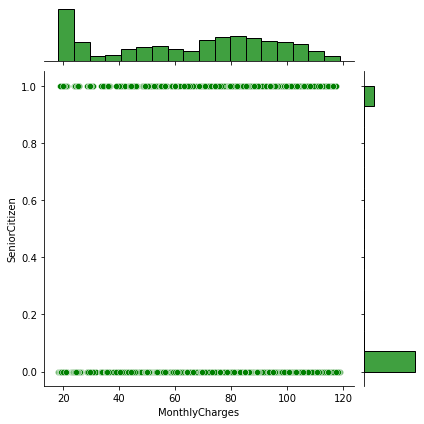

In [23]:
sns.jointplot(data['MonthlyCharges'],data['SeniorCitizen'],color='green');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

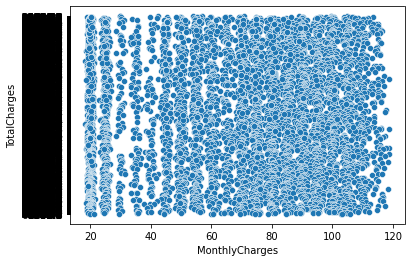

In [24]:
sns.scatterplot(data['MonthlyCharges'], data['TotalCharges'])

In [25]:
# plot the correlation coefficients as a heatmap

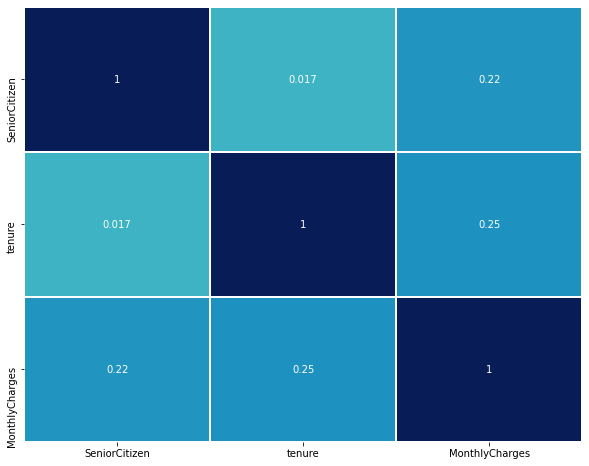

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [27]:
# Loop through all columns in the dataframe
# Only apply for columns with categorical strings
# Replace strings with an integer


for feature in data.columns: 
    if data[feature].dtype == 'object':
        data[feature] = pd.Categorical(data[feature])
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Get value counts for every column

In [28]:
#levels of Y variable
data['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [29]:
print(data.InternetService.value_counts())
print(data.PaymentMethod.value_counts())
print(data.Churn.value_counts())
print(data.Contract.value_counts())


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
No     5174
Yes    1869
Name: Churn, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [30]:
replaceStructure = {
                 "InternetService":{"Fiber optic": 1, "DSL":2,"No":3},
                 "Contract":{"Month-to-month": 1, "One year": 2,"Two year":3},
                 "PaymentMethod":{"Electronic check": 1, "Mailed check": 2,"Bank transfer (automatic)":3,"Credit card (automatic)":4},
                  "Churn": {"No": 1, "Yes": 2}  }
oneHotCols=["gender","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]

Print a concise summary of a DataFrame

In [32]:
data=data.replace(replaceStructure)
data=pd.get_dummies(data, columns=oneHotCols)
data.head(10)

,customerID,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,7590-VHVEG,0,1,2,1,1,29.85,29.85,1,1,...,0,0,1,0,0,1,0,0,0,1
1,5575-GNVDE,0,34,2,2,2,56.95,1889.5,1,0,...,0,0,1,0,0,1,0,0,1,0
2,3668-QPYBK,0,2,2,1,2,53.85,108.15,2,0,...,0,0,1,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,2,2,3,42.30,1840.75,1,0,...,0,1,1,0,0,1,0,0,1,0
4,9237-HQITU,0,2,1,1,1,70.70,151.65,2,1,...,0,0,1,0,0,1,0,0,0,1
5,9305-CDSKC,0,8,1,1,1,99.65,820.5,2,1,...,0,0,0,0,1,0,0,1,0,1
6,1452-KIOVK,0,22,1,1,4,89.10,1949.4,1,0,...,0,0,0,0,1,1,0,0,0,1
7,6713-OKOMC,0,10,2,1,2,29.75,301.9,1,1,...,0,0,1,0,0,1,0,0,1,0
8,7892-POOKP,0,28,1,1,1,104.80,3046.05,2,1,...,0,1,0,0,1,0,0,1,0,1
9,6388-TABGU,0,62,2,2,3,56.15,3487.95,1,0,...,0,0,1,0,0,1,0,0,1,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   customerID                            7043 non-null   category
 1   SeniorCitizen                         7043 non-null   int64   
 2   tenure                                7043 non-null   int64   
 3   InternetService                       7043 non-null   int64   
 4   Contract                              7043 non-null   int64   
 5   PaymentMethod                         7043 non-null   int64   
 6   MonthlyCharges                        7043 non-null   float64 
 7   TotalCharges                          7043 non-null   category
 8   Churn                                 7043 non-null   int64   
 9   gender_Female                         7043 non-null   uint8   
 10  gender_Male                           7043 non-null   uint8   
 11  Part

# Split Data


In [34]:
X = data.drop(["customerID","Churn","TotalCharges"], axis=1)
y = data["Churn"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Build Decision Tree Model


We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [36]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9977687626774848
0.7463322290582111


# Visualizing the Decision Tree

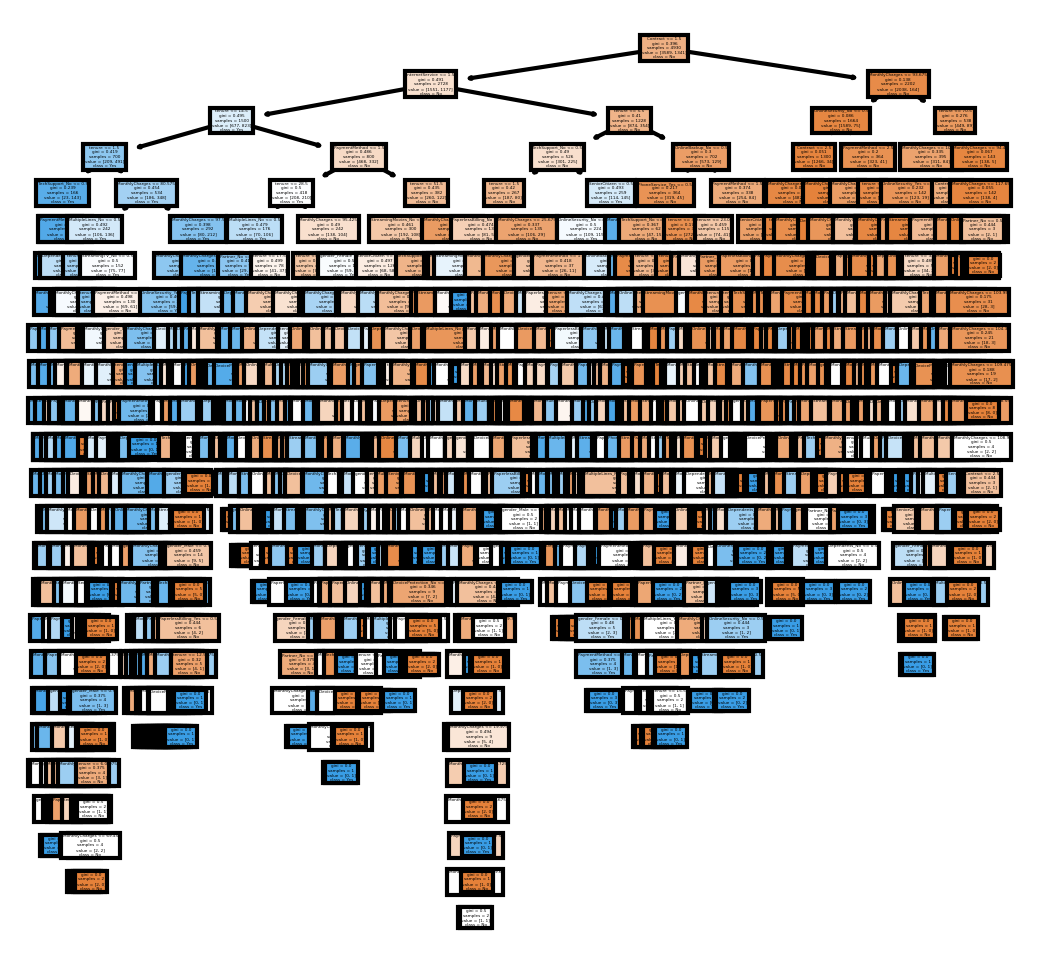

In [38]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

# Reducing over fitting (Regularization)

In [39]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7851926977687627
0.8021769995267393


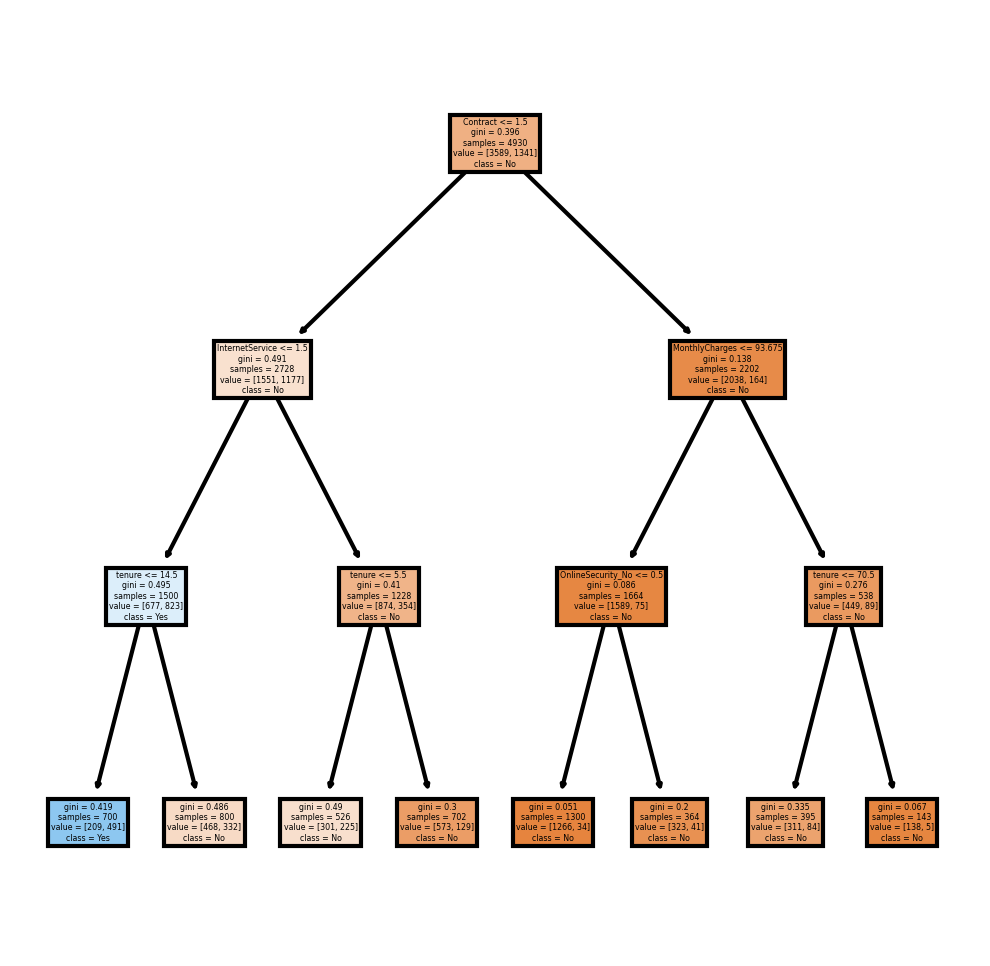

In [40]:

# Using plot_tree method from sklearn.tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree2.png')

# 
Importance of features in the tree building

In [41]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                           Imp
SeniorCitizen                         0.000000
tenure                                0.198706
InternetService                       0.175471
Contract                              0.595099
PaymentMethod                         0.000000
MonthlyCharges                        0.022571
gender_Female                         0.000000
gender_Male                           0.000000
Partner_No                            0.000000
Partner_Yes                           0.000000
Dependents_No                         0.000000
Dependents_Yes                        0.000000
PhoneService_No                       0.000000
PhoneService_Yes                      0.000000
MultipleLines_No                      0.000000
MultipleLines_No phone service        0.000000
MultipleLines_Yes                     0.000000
OnlineSecurity_No                     0.008152
OnlineSecurity_No internet service    0.000000
OnlineSecurity_Yes                    0.000000
OnlineBackup_

# Confusion matrix

0.8021769995267393


<AxesSubplot:>

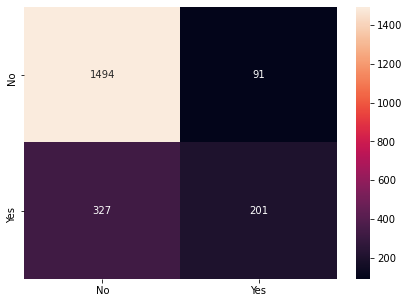

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(X_test, y_test))
y_predict = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier

baggingtree = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#baggingtree = BaggingClassifier(n_estimators=50,random_state=1)

baggingtree = baggingtree.fit(X_train, y_train)


In [46]:
print(baggingtree.score(X_train, y_train))
print(baggingtree.score(X_test, y_test))

0.9973630831643002
0.7969711310932324


0.7969711310932324


<AxesSubplot:>

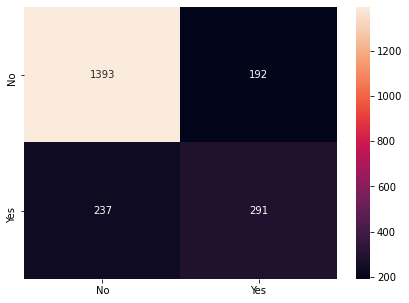

In [48]:
y_predict = baggingtree.predict(X_test)

print(baggingtree.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [49]:
from sklearn.ensemble import AdaBoostClassifier
adabtree = AdaBoostClassifier(n_estimators=10, random_state=1)
#adabtree = AdaBoostClassifier( n_estimators=50,random_state=1)
adabtree = adabtree.fit(X_train, y_train)

In [50]:
print(adabtree.score(X_train, y_train))
print(adabtree.score(X_test, y_test))

0.78052738336714
0.7884524372929484


0.7884524372929484


<AxesSubplot:>

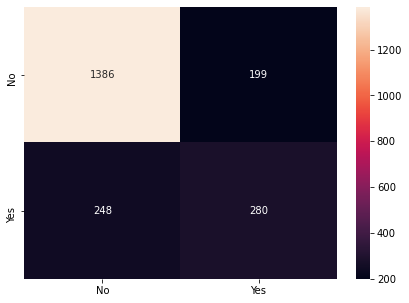

In [52]:
y_predict = adabtree.predict(X_test)
print(adabtree.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - GradientBoost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gradbtree = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gradbtree = gradbtree.fit(X_train, y_train)

In [54]:
print(gradbtree.score(X_train, y_train))
print(gradbtree.score(X_test, y_test))

0.8156186612576065
0.8078561287269286


0.8078561287269286


<AxesSubplot:>

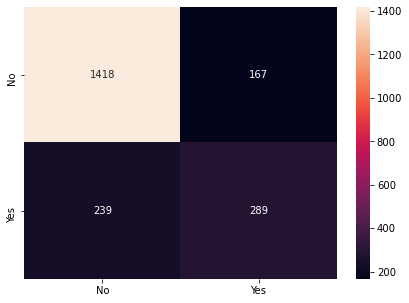

In [56]:
y_predict = gradbtree.predict(X_test)
print(gradbtree.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
randomforest = randomforest.fit(X_train, y_train)

In [58]:
print(randomforest.score(X_train, y_train))
print(randomforest.score(X_test, y_test))


0.9975659229208925
0.7941315664931378


0.7941315664931378


<AxesSubplot:>

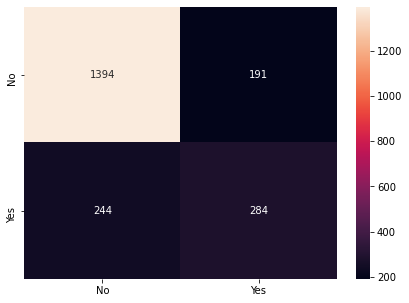

In [59]:
y_predict = randomforest.predict(X_test)
print(randomforest.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Conclusion and improvisation: 


. This decision tree model is 'overfitted'
Highest possible accuracy is 99.% Some pointers
